<a href="https://colab.research.google.com/github/piyushkchaudhari/CAPSTONE-PROJECT-UNSUPERVISED-NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING-/blob/main/CAPSTONE_PROJECT_UNSUPERVISED_(NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **NETFLIX MOVIES AND TV SHOWS CLUSTERING**

### Project Type - Unsupervised

### Contribution - Individual


## **Problem Statement**

### This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

### In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

### Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
###1. Exploratory Data Analysis

###2. Understanding what type content is available in different countries

###3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
###4. Clustering similar content by matching text-based features


## **GitHub Link -**[link text](https://github.com/piyushkchaudhari/CAPSTONE-PROJECT-UNSUPERVISED-NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING-)

## **Importing the libraries**

In [ ]:
# IMPORTIGN LIBRARY
import numpy as np
import pandas as pd
from numpy import math

# visualization Library
import seaborn as sns
import matplotlib.pyplot as plt

# null value visualization Library
import missingno as msno

from sklearn.model_selection import GridSearchCV

# nlp module Library
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
nltk.download('punkt')
from sklearn.feature_extraction.text import TfidfVectorizer
import re

# WordCloud Library
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Dimensionality reduction Library
from sklearn.decomposition import PCA

# Clustering Algorithms
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Plotly visualization Library
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Dataset Loading

In [ ]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# file path of dataset
path='/content/drive/MyDrive/Almabetter/Machine Learning /NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv'
df=pd.read_csv(path)

## Dataset First View

In [ ]:
# top 5 rows
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
# last 5 rows
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


## Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print(f" Number of rows in the dataset : {df.shape[0]} \n Number of columns in the dataset : {df.shape[1]}")

 Number of rows in the dataset : 7787 
 Number of columns in the dataset : 12


## Dataset Information

In [ ]:
# Checking info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [ ]:
# Basic stat description
df.describe(include = 'all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


## Attribute Information

###1. show_id : Unique ID for every Movie / Tv Show

###2. type : Identifier - A Movie or TV Show

###3. title : Title of the Movie / Tv Show

###4. director : Director of the Movie

###5. cast : Actors involved in the movie / show

###6. country : Country where the movie / show was produced

###7. date_added : Date it was added on Netflix

###8. release_year : Actual Releaseyear of the movie / show

###9. rating : TV Rating of the movie / show

###10. duration : Total Duration - in minutes or number of seasons

###11. listed_in : Genere

###12. description: The Summary description

## Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

## Check Unique Values for each variable.

In [ ]:
# Checking unique values
df.nunique(dropna = True).sort_values(ascending=False)

show_id         7787
title           7787
description     7769
cast            6831
director        4049
date_added      1565
country          681
listed_in        492
duration         216
release_year      73
rating            14
type               2
dtype: int64

## **About dataset** :
###Only two types of types are present in this dataset namely Movies and TV Shows. This dataset has 7787 rows and 12 columns. Only one column is in numerical format.

## Feature engineering

In [ ]:
# Date columns to Date format conversion
from datetime import datetime
df['date_added']=pd.to_datetime(df['date_added'])

# Creating new year column
df['year_added']=df['date_added'].dt.year

# Replace spaces with an empty string
df['country']=df['country'].str.replace(' ','')

## **Feature engineering :**
###  Date column in this dataset is in object format, it has to be converted to date format.
###A new column named Year_Added has been added to the dataset.
### string space inside country column is replaced with empty string

In [ ]:
# Cheking data
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018.0
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",UnitedStates,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017.0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",UnitedStates,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020.0


# **(1) Exploratory Data Analysis**

## 1.1 Top actors with higest count of movies and tv shows

In [ ]:
# convert the cast to get final df for cast
cast=df.copy()
cast['actors'] = cast['cast'].str.split(",")
cast = cast.explode("actors").reset_index()

In [ ]:
# Top actors with higest count of movies and tvshows
top_actors = cast['actors'].value_counts().reset_index().sort_values(by='actors',ascending=False).head(20)
# visualization with bar chart
trace1 = go.Bar(
                x = top_actors['index'],
                y = top_actors['actors'],
                name="TV Shows,movies",
                marker_color = 'rgb(55, 83, 109)')

layout = go.Layout(title = 'Top actors with higest count of movies and tvshows' , xaxis = dict(title = 'Actors'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show(renderer="colab")

## **Insight :**
### Anupam Kher, Takahiro Sakurai, Om Puri and Shah Rukh Khan are the actors who contributed the most to Netflix content
### Anupam Kair has acted in maximum number of movies Anupam Kair has acted in 38 movies

## 1.2 Top actors with higest count of tvshows

In [ ]:
# Top actors with higest count of tvshows
tvshows = cast[cast["type"] == "TV Show"]
tvshowsdf = tvshows['actors'].value_counts().reset_index().sort_values(by='actors',ascending=False).head(20)
# visualization with bar chart
trace1 = go.Bar(
                x = tvshowsdf['index'],
                y = tvshowsdf['actors'],
                name="TV Shows",
                marker_color = 'rgb(55, 83, 109)')

layout = go.Layout(title = 'Top actors with higest count of tvshows' , xaxis = dict(title = 'Actors'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show(renderer='colab')

## **Insight :**
### Takahiro Sakurai, Ai Kayano, Junichi Suwabe and Yuki Kaji are the actors with the most Netflix Tv shows
### Takahira Sakurai has acted in maximum number of TV Show Takahira Sakurai has acted in 22 TV Show

## 1.3 Top actors with higest count of Movies


In [ ]:
# Top actors with higest count of Movies
movies = cast[cast["type"] == "Movie"]
moviesdf = movies['actors'].value_counts().reset_index().sort_values(by='actors',ascending=False).head(20)
# visualization with bar chart
trace1 = go.Bar(
                x = moviesdf['index'],
                y = moviesdf['actors'],
                name="Movies",
                marker_color = 'rgb(55, 83, 109)')

layout = go.Layout(title = 'Top actors with higest count of Movies' , xaxis = dict(title = 'Actors'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show(renderer='colab')

## **Insight :**
###  Anupam Kher, Shah Rukh Khan, Om Puri and Boman Irani  are the actors with the most Netflix  Movies
###Anupam Kair has acted in maximum number of movies Anupam Kair has acted in 37 movies

## 1.4 Which words frequently use in title column

In [ ]:
text=df['title']
text = " ".join(word for word in text)
# Create stopword list:
stopwords = set(STOPWORDS)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## **Insight :**
### Christmas, Love, World and Man words frequently use in title column.

## 1.5 Netflix Content Analysis

In [ ]:
# number of values of different categories in 'type'
tvshows_movies=df.groupby('type')['type'].count()
tvshows_movies

type
Movie      5377
TV Show    2410
Name: type, dtype: int64

In [ ]:
# visualization with pie chart
labels = 'Movies' , 'TV Show'
sizes = tvshows_movies
colors = [ "#7570B3","#1B9E77"]
explode = (0.1, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=120)
plt.axis('equal')
plt.title("Netflix Content Analysis",fontsize=20)
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()


## **Insight :**
### There are more movies datapoints in the dataset than TV shows
### Almost 70% of datapoints belong to Movie, rest 30% to TV Show

## 1.6 Movies and Tv Show Duration Distribution Analysis

In [ ]:
# Distribution of Movies Duration
durationmovies=df[df["type"] == "Movie"]
durationmovies['duration']=durationmovies['duration'].str.replace('min','').astype(int)
# visualization with bar chart
sns.displot(durationmovies, x="duration", kde=True,color="black")

## **Insight :**
###Most of the content for movies is around 70 to 140 minutes in duration

In [ ]:
# Distribution of Tv Show Duration
durationtv=df[df["type"] == "TV Show"]
durationtv['duration']=durationtv['duration'].str.replace('Seasons','').str.replace('Season','').astype(int)
# visualization with bar chart
sns.displot(durationtv, x="duration", kde=True,color="black")

## **Insight :**
### Most of the shows are 1 to 2 seasons long


## 1.7 How does the movie runtime vary across different genres

In [ ]:
# convert the genres to get final df for genres
runtime_genres=durationmovies.copy()
runtime_genres['listed_in'] = runtime_genres['listed_in'].str.split(",")
runtime_genres =runtime_genres.explode("listed_in")
runtime_genres['listed_in'] = runtime_genres['listed_in'].str.replace(" ",'')

In [ ]:
# Movie runtime vary across different genres
runtime_genres_final=runtime_genres.groupby('listed_in')['duration'].mean().reset_index().sort_values(by='duration',ascending=False)
# visualization with bar chart
trace1 = go.Bar(
                x = runtime_genres_final['listed_in'],
                y = runtime_genres_final['duration'],
                name="Movies",
                marker_color = 'indianred')

layout = go.Layout(title = 'movie runtime vary across different genres' , xaxis = dict(title = 'Genres'), yaxis = dict(title = 'Average Duration'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show(renderer='colab')

## **Insight :**

### The ClassicMovies, Dramas, Action&Adventure and InternationalMovies genre have  a high duration of runtime

## 1.8 Which genres have the highest number of movies produced

In [ ]:
# convert the genres to get final df for genres
genre=df.copy()
genre['listed_in'] = genre['listed_in'].str.split(",")
genre = genre.explode("listed_in").reset_index()
genre['listed_in'] = genre['listed_in'].str.replace(" ",'')

In [ ]:
# Highest Number of Movies produced by genres
genre_movies = genre[genre["type"] == "Movie"]
higest_genres_produced=genre_movies.groupby('listed_in')['title'].count().sort_values(ascending=False).reset_index().head(10)
# visualization with pie chart
fig = px.pie(higest_genres_produced,
             title='Highest Number of Movies produced by genres',
             color_discrete_sequence=px.colors.sequential.RdBu,
             values='title', names='listed_in')
fig.show()

## **Insight :**
### InternationalMovies, Dramas and Comedies genres made up the most Netflix Movies

## 1.9 Which genres have the highest number of tv show produced

In [ ]:
# Highest Number of Tv Show produced by genres
genre_tvshows = genre[genre["type"] == "TV Show"]
higest_genres_produced_tvshow=genre_tvshows.groupby('listed_in')['title'].count().sort_values(ascending=False).reset_index().head(10)
# visualization with pie chart
fig = px.pie(higest_genres_produced_tvshow,
             title='Highest Number of Tv Show produced by genres',
             color_discrete_sequence=px.colors.sequential.RdBu,
             values='title', names='listed_in')
fig.show()

## **Insight :**
### InternationalTVShows, TVDramas and TVComedies genres made up the most Netflix TV Shows.

## 1.10 Which words frequently use in Description column

In [ ]:
text=df['description']
text = " ".join(word for word in text)
# Create stopword list:
stopwords = set(STOPWORDS)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## **Insight :**
### Family, Life, find and Love words frequently use in Description column.

## 1.11 content release over the year

In [ ]:
# content release over the year
release_year_frequency=df['release_year'].value_counts().reset_index()
# visualization with bar chart
trace1 = go.Bar(
                x = release_year_frequency['index'],
                y = release_year_frequency['release_year'],
                name="Movies",
                marker_color = 'rgb(55, 83, 109)')

layout = go.Layout(title = 'content release over years' , xaxis = dict(title = 'Actors'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show(renderer='colab')

## **Insight :**
### Most of the content release in 2017, 2018 and 2019.

## 1.12 content release over the year by content type

In [ ]:
year_tvshows = df[df["type"] == "TV Show"]
year_movies = df[df["type"] == "Movie"]

In [ ]:
# content release over the year by content type

temp_df1 = year_tvshows['release_year'].value_counts().reset_index()
temp_df2 = year_movies['release_year'].value_counts().reset_index()


# create trace1
trace1 = go.Bar(
                x = temp_df1['index'],
                y = temp_df1['release_year'],
                name="TV Shows",
                marker_color='indianred')
# create trace2
trace2 = go.Bar(
                x = temp_df2['index'],
                y = temp_df2['release_year'],
                name = "Movies",
                marker_color='lightsalmon')


layout = go.Layout(title = 'content release over the year by content type' , xaxis = dict(title = 'Year'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace1, trace2], layout = layout)
fig.show(renderer='colab')

## **Insight :**
### Most of the Netflix Movies release in 2017, 2018 and 2016.
### Most of the Netflix TV Show release in 2018, 2019 and 2020.

## 1.13 Highest Number of Movies and Tv Show produced by Country

In [ ]:
# convert the country to get final df for country
country=df.copy()
country['country'] = country['country'].str.split(",")
country = country.explode('country').reset_index()

In [ ]:
# Highest Number of Movies and Tv Show produced by Country
top_country=country['country'].value_counts().reset_index().head(10)
top_country.rename(columns = {'index':'country', 'country':'produced',
                              }, inplace = True)
# visualization with bubble chart
fig = px.scatter(top_country, x='produced', y='produced',
	         size="produced", color="country",
                 hover_name="produced", log_x=True, size_max=60)
fig.show()

## **Insight :**
### Most of the Netflix content produced by UnitedState, India and UnitedKingdom.

## 1.14 Top director with higest count of movies and tvshows

In [ ]:
# convert the director to get final df for director
director=df.copy()
director['director'] = director['director'].str.split(",")
director= director.explode("director").reset_index()

In [ ]:
# Top director with higest count of movies and tvshows
release_year_frequency=director['director'].value_counts().reset_index().head(10)

# Get key properties for colours and labels
max_value_full_ring = max(release_year_frequency['director'])

ring_colours = ['#2f4b7c', '#665191', '#a05195','#d45087',
               '#f95d6a','#ff7c43','#ffa600','darkorange','orangered','red']

ring_labels = [f'   {x} ({v}) ' for x, v in zip(list(release_year_frequency['index']),
                                                 list(release_year_frequency['director']))]
data_len = len(release_year_frequency)

# Begin creating the figure
fig = plt.figure(figsize=(10,10), linewidth=10,
                 edgecolor='#393d5c',
                 facecolor='#25253c')

rect = [0.1,0.1,0.8,0.8]

# Add axis for radial backgrounds
ax_polar_bg = fig.add_axes(rect, polar=True, frameon=False)
ax_polar_bg.set_theta_zero_location('N')
ax_polar_bg.set_theta_direction(1)

# Loop through each entry in the dataframe and plot a grey
# ring to create the background for each one
for i in range(data_len):
    ax_polar_bg.barh(i, max_value_full_ring*1.5*np.pi/max_value_full_ring,
                     color='grey',
                     alpha=0.1)
# Hide all axis items
ax_polar_bg.axis('off')

# Add axis for radial chart for each entry in the dataframe
ax_polar = fig.add_axes(rect, polar=True, frameon=False)
ax_polar.set_theta_zero_location('N')
ax_polar.set_theta_direction(1)
ax_polar.set_rgrids([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
                    labels=ring_labels,
                    angle=0,
                    fontsize=14, fontweight='bold',
                    color='white', verticalalignment='center')

# Loop through each entry in the dataframe and create a coloured
# ring for each entry
for i in range(data_len):
    ax_polar.barh(i, list(release_year_frequency['director'])[i]*1.5*np.pi/max_value_full_ring,
                  color=ring_colours[i])


# Hide all grid elements for the
ax_polar.grid(False)
ax_polar.tick_params(axis='both', left=False, bottom=False,
                   labelbottom=False, labelleft=True)

plt.show()

## **Insight :**
### Raul Campos, Jan Sutar, Marcus Raboy and Jay Karas directed most of the movies and TV shows

## 1.15 Top rating with highest count of movies and tv show

In [ ]:
# Top rating with highest count of movies and tv show
rating=df.groupby('rating')['title'].count().sort_values(ascending=False).reset_index()
# visualization with pie chart
fig = px.pie(rating,
             title='top rating with highest with movies and tv show',
             color_discrete_sequence=px.colors.sequential.RdBu,
             values='title', names='rating')
fig.show()

## **Insight :**
### TV-14 TV-MA has the highest number of Netflix movies and TV shows ever

In [ ]:
# convert the rating to get final df for rating
moviesdf=df[df["type"] == "Movie"]
moviesrating=moviesdf.groupby('rating')['title'].count().sort_values(ascending=False).reset_index()
tvdf=df[df["type"] == "TV Show"]
tvrating=tvdf.groupby('rating')['title'].count().sort_values(ascending=False).reset_index()

In [ ]:
# create trace1
trace1 = go.Bar(
                y = tvrating['title'],
                x = tvrating['rating'],
                name="TV Shows",
                marker_color='indianred')
# create trace2
trace2 = go.Bar(
                y = moviesrating['title'],
                x = moviesrating['rating'],
                name = "Movies",
                marker_color='lightsalmon')


layout = go.Layout(title = 'content release over the year by content type' , xaxis = dict(title = 'Year'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace1, trace2], layout = layout)
fig.show(renderer='colab')

#**(2). Understanding what type content is available in different countries**





## 2.1 Number of Movies and Tv Show produced by Country

In [ ]:
# Number of Movies and Tv Show produced by Country
top_country=country['country'].value_counts().reset_index()
top_country.rename(columns = {'index':'country', 'country':'produced',
                              }, inplace = True)
fig = px.scatter(top_country, x='produced', y='produced',
	         size="produced", color="country",
                 hover_name="produced", log_x=True, size_max=60)
fig.show()


## 2.2 Number of Movies produced by Country

In [ ]:
# Number of Movies produced by Country
movies_country=country[country["type"] == "Movie"]
movies_country=movies_country.groupby('country')['type'].count().reset_index()

In [ ]:
#total movies per country
sns.set_theme()
trace = go.Choropleth(
            locations = movies_country['country'],
            locationmode='country names',
            z = movies_country['type'],
            text =movies_country['country'],
            autocolorscale =True,
            reversescale = False,
            zauto = True,
            colorscale = 'RdBu',
            marker = dict(
                line = dict(
                    color = 'rgb(0,0,0)',
                    width = 0.5)
            ),
            colorbar = dict(
                title = 'Total Content',
                tickprefix = '')
        )

data = [trace]
layout = go.Layout(
    title = 'Number of Movies produced by Country',
    geo = dict(
        showframe = True,
        showlakes = False,
        showcoastlines = True,
        projection = dict(type = 'orthographic')
    )
)

fig = go.Figure(data=data, layout=layout)
fig.show()

## 2.3 Number of TV Show produced by Country

In [ ]:
# Number of TV Show produced by Country
tvshow_country=country[country["type"] == "TV Show"]
tvshow_country=tvshow_country.groupby('country')['type'].count().reset_index()

In [ ]:
#total tvshow per country
sns.set_theme()
trace = go.Choropleth(
            locations = tvshow_country['country'],
            locationmode='country names',
            z = tvshow_country['type'],
            text =tvshow_country['country'],
            reversescale = False,
            zauto = True,
            colorscale = 'Rainbow',
            marker = dict(
                line = dict(
                    color = 'rgb(0,0,0)',
                    width = 0.5)
            ),
            colorbar = dict(
                title = 'Total Content',
                tickprefix = '')
        )

data = [trace]
layout = go.Layout(
    title = 'Number of TV Show produced by Country',
    geo = dict(
        showframe = True,
        showlakes = False,
        showcoastlines = True,
        projection = dict(type = 'orthographic')
    )
)

fig = go.Figure(data=data, layout=layout)
fig.show()

## 2.4 Average Movie Duration by Country

In [ ]:
# Average Movie Duration by Country
movies_country=country[country["type"] == "Movie"]
movies_country['duration']=movies_country['duration'].str.replace('min','').astype(int)
movies_duration=movies_country.groupby('country')['duration'].mean().reset_index()

In [ ]:
# average movie duration per country
sns.set_theme()
trace = go.Choropleth(
            locations = movies_duration['country'],
            locationmode='country names',
            z = movies_duration['duration'],
            text =movies_duration['country'],
            reversescale = False,
            zauto = True,
            colorscale = 'Rainbow',
            marker = dict(
                line = dict(
                    color = 'rgb(0,0,0)',
                    width = 0.5)
            ),
            colorbar = dict(
                title = 'Total Content',
                tickprefix = '')
        )

data = [trace]
layout = go.Layout(
    title = 'Average Movie Duration by Country',
    geo = dict(
        showframe = True,
        showlakes = False,
        showcoastlines = True,

    )
)

fig = go.Figure(data=data, layout=layout)
fig.show()

## 2.5 Country wise Rating trend

In [ ]:
#getting country wise rating trend
rating_country=country.groupby(['country','rating'])['type'].count().reset_index()
rating_country=rating_country[rating_country['country']!='']

In [ ]:
## visualization with for loop
j=list(rating_country['country'].unique())
for i in j:
# Set the figure size
    plt.figure(figsize=(5, 5))
    data=rating_country[rating_country['country']==i]
# plot a bar chart
    sns.barplot(
       y=data['rating'],
       x=data['type'],
       data=rating_country,
       estimator=sum,
       color='darksalmon').set(
          xlabel ='Productions',title=i)

In [ ]:
# visualization with bubble chart
rating_country.rename(columns = {'type':'Production'}, inplace = True)
fig = px.scatter(rating_country, x='Production', y='Production',
	         size="Production", color="country",
                 hover_name="rating", hover_data=['country','rating','Production'],log_x=True, size_max=60)
fig.show()

## 2.6 Country wise Genres trend

In [ ]:
#getting country wise genres trend
genres_country=country.copy()
genres_country['listed_in'] = genres_country['listed_in'].str.split(",")
genres_country = genres_country.explode("listed_in").reset_index()
genres_country['listed_in']=genres_country['listed_in'].str.replace(' ','')
genres_country=genres_country.groupby(['country','listed_in'])['type'].count().reset_index()

In [ ]:
## visualization with for loop
k=list(genres_country['country'].unique())
for i in k:
# Set the figure size
    plt.figure(figsize=(7, 7))
    data=genres_country[genres_country['country']==i]
# plot a bar chart
    sns.barplot(
       y=data['listed_in'],
       x=data['type'],
       data=rating_country,
       estimator=sum,
       color=(0.5,0.1,0.5,0.6)).set(
          xlabel ='Productions',title=i)

In [ ]:
# visualization with bubble chart
genres_country.rename(columns = {'type':'Production'}, inplace = True)
fig = px.scatter(genres_country, x='Production', y='Production',
	         size="Production", color="country",
                 hover_name="listed_in", hover_data=['country','listed_in','Production'],log_x=True, size_max=60)
fig.show()

# **(3) Is Netflix has increasingly focusing on TV rather than movies in recent years.**

In [ ]:
## convert the year added to get final df for year added
recent=df.copy()
recent.dropna(subset=['date_added'],inplace=True)
recent['year_added']=recent['year_added'].astype(int)

In [ ]:
# Movies and Tv Show added per year
recent_year=recent['year_added'].value_counts().reset_index()

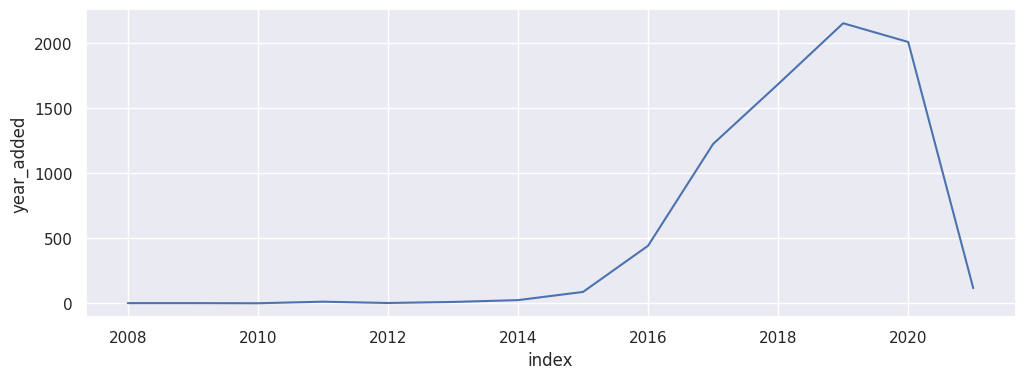

In [ ]:
# visualization with line chart
fig = plt.figure(figsize = (12, 4))
sns.lineplot(x="index", y="year_added", data=recent_year)
plt.show()


## **Insight :**
### Netflix content has increased frequently in recent years since 2016

In [ ]:
# Movies and Tv Show added per year
recent_tvshows = recent[recent["type"] == "TV Show"]
recent_movies = recent[recent["type"] == "Movie"]
recent_movies =recent_movies['year_added'].value_counts().sort_values( ascending=False).reset_index()
recent_movies.rename(columns = {'index':'year', 'year_added':'movies',
                              }, inplace = True)
recent_tvshows =recent_tvshows['year_added'].value_counts().sort_values( ascending=False).reset_index()
recent_tvshows.rename(columns = {'index':'year', 'year_added':'tvshow',
                              }, inplace = True)
recent_year_final=pd.merge(recent_movies,recent_tvshows,how='left')
recent_year_final['tvshow']=recent_year_final['tvshow'].fillna(0).astype(int)
recent_year_final=recent_year_final.sort_values( by='year',ascending=False).reset_index()

In [ ]:
# visualization with line chart
fig = px.line(recent_year_final, x='year', y=['movies','tvshow'], markers=True)
fig.show()

## **Insight :**
### Netflix Movis and TV Show has increased frequently in recent years since 2016

In [ ]:
## Movies and Tv Show added per year data
recent_year_final

,index,year,movies,tvshow
0,5,2021,88,29
1,1,2020,1312,697
2,0,2019,1497,656
3,2,2018,1255,430
4,3,2017,864,361
5,4,2016,258,185
6,6,2015,58,30
7,7,2014,19,6
8,9,2013,6,5
9,10,2012,3,0


In [ ]:
# comparison between recent year and previous year
recent_year_changes1=pd.DataFrame(recent_year_final[recent_year_final['year']<2018].sum())
recent_year_changes1=recent_year_changes1.transpose()
recent_year_changes2=pd.DataFrame(recent_year_final[recent_year_final['year']>=2018].sum())
recent_year_changes2=recent_year_changes2.transpose()
recent_year_changes=pd.concat([recent_year_changes1,recent_year_changes2],axis=0)
recent_year_changes=recent_year_changes.drop(['index','year'],axis=1)
recent_year_changes.insert(0, "year", ['previous years','recent years'], True)

In [ ]:
# Percentage
recent_year_changes['movies_percentage_change']=recent_year_changes['movies'].pct_change()*100
recent_year_changes['tvshow_percentage_change']=recent_year_changes['tvshow'].pct_change()*100

In [ ]:
# comparison between recent year and previous year data
recent_year_changes

,year,movies,tvshow,movies_percentage_change,tvshow_percentage_change
0,previous years,1225,588,NaN,NaN
0,recent years,4152,1812,238.938776,208.163265


## **Insight :**
### Netflix Movies Have Grown By 238% Over The Last Years
### Netflix TV Show Have Grown By 208% Over The Last Years

In [ ]:
# visualization with pie chart
piechart=recent_year_changes[recent_year_changes['year']=='recent years']
piechart=piechart.drop(['movies','year',	'tvshow'],axis=1)
labels = 'movies_percentage_change' , 'tvshow_percentage_change'
sizes = piechart.iloc[0]
colors = [ "#7570B3","#1B9E77"]
explode = (0.1, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=100)
plt.axis('equal')
plt.title("Is Netflix has increasingly focusing on TV rather than movies in recent years",fontsize=20)
plt.plot()
fig=plt.gcf()
fig.set_size_inches(5,5)
plt.show()

## **Insight :**
##Netflix has increased movies as well as TV shows in recent years

## **Missing Values/Null Values**

In [ ]:
# Checking missing values
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
year_added        10
dtype: int64

In [ ]:
# missing values percentage
round(df.isnull().sum()/len(df)*100,2).sort_values(ascending=False)

director        30.68
cast             9.22
country          6.51
date_added       0.13
year_added       0.13
rating           0.09
show_id          0.00
type             0.00
title            0.00
release_year     0.00
duration         0.00
listed_in        0.00
description      0.00
dtype: float64

## director column contains more than 30% null values

In [ ]:
# Visualizing the missing values using barplot
msno.bar(df,sort='ascending',figsize=(10,5),fontsize=11)

In [ ]:
# Visualizing the missing values using Heatmap
null_mask = df.isnull()
plt.figure(figsize=(10, 6))
sns.heatmap(null_mask, cmap='viridis', cbar=True)
plt.title('Null Values Visualization')
plt.show()

## As we saw there are null values in columns. we are replacing missing values.

In [ ]:
# Drop Director column from dataset
df.drop(['director'],axis=1,inplace=True)
# Drop null values from date_added and rating columns
df.dropna(subset=['date_added','rating'],inplace=True)
# fill null values in cast and coutry columns
df['cast'].fillna('',inplace=True)
df['country'].fillna('',inplace=True)


### Drop director column from dataset because director column contains more than 30% null values
### Drop null values ​​from data_added and rating column as there are too few null values ​​present in this column
### fill null values in cast and country columns

# **(4) Clustering similar content by matching text-based features**

In [ ]:
# Checking info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7770 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7770 non-null   object        
 1   type          7770 non-null   object        
 2   title         7770 non-null   object        
 3   cast          7770 non-null   object        
 4   country       7770 non-null   object        
 5   date_added    7770 non-null   datetime64[ns]
 6   release_year  7770 non-null   int64         
 7   rating        7770 non-null   object        
 8   duration      7770 non-null   object        
 9   listed_in     7770 non-null   object        
 10  description   7770 non-null   object        
 11  year_added    7770 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(9)
memory usage: 789.1+ KB


## 4.1 Checking word length for genres and description column

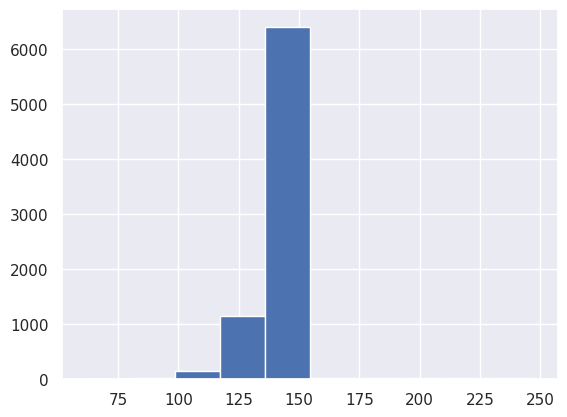

In [ ]:
# Checking word length for description column
description_len  = [len(x) for x in df['description']]
description_len = np.array(description_len)
plt.hist(description_len)
plt.show()

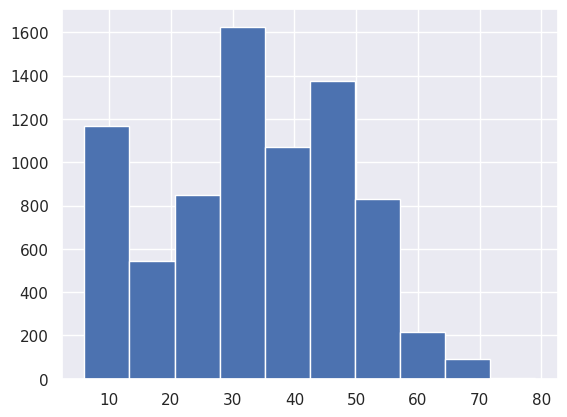

In [ ]:
# Checking word length for genres column
description_len  = [len(x) for x in df['listed_in']]
description_len = np.array(description_len)
plt.hist(description_len)
plt.show()

## 4.2 Text preprocessing

In [ ]:
# appending listed_in and description column to single text column to work with
df['text_clustering']=df['listed_in']+' '+df['description']

In [ ]:
df['text_clustering'][0]

'International TV Shows, TV Dramas, TV Sci-Fi & Fantasy In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.'

## 4.3 Remove punctuations

In [ ]:
# function to remove punctuations
def punctuation(string):
  return re.sub(r'[^\w\s]','',string)
df['text_clustering']=df['text_clustering'].apply(punctuation)

In [ ]:
df['text_clustering'][0]

'International TV Shows TV Dramas TV SciFi  Fantasy In a future where the elite inhabit an island paradise far from the crowded slums you get one chance to join the 3 saved from squalor'

## 4.4 Remove stopwords and lower case

In [ ]:
# lower case
df['text_clustering']=df['text_clustering'].str.lower()

In [ ]:
# nlp module Library
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# function to remove stop words
stop_words = set(stopwords.words('english'))
def remove_stop_words(sentence):
  words = sentence.split()
  # Use a list comprehension to remove stop words
  filtered_words = [word for word in words if word not in stop_words]
  # Join the filtered words back into a sentence
  return ' '.join(filtered_words)

In [ ]:
df['text_']=df['text_clustering'].apply(remove_stop_words)

In [ ]:
df['text_'][0]

'international tv shows tv dramas tv scifi fantasy future elite inhabit island paradise far crowded slums get one chance join 3 saved squalor'

## 4.5 Stemming

In [ ]:
## function for Stemming
stemmer=PorterStemmer()
def stemming(text):
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

In [ ]:
df['text_']=df['text_'].apply(stemming)

In [ ]:
df['text_'][0]

'intern tv show tv drama tv scifi fantasi futur elit inhabit island paradis far crowd slum get one chanc join 3 save squalor'

## 4.6 TFIDF Vectorization

In [ ]:
# Vectorization:
vectorizer = TfidfVectorizer(max_features=10000)
X= vectorizer.fit_transform(df['text_'])

In [ ]:
X

<7770x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 133014 stored elements in Compressed Sparse Row format>

## 4.7 Dimensionality reduction

In [ ]:
# PCA
transformer = PCA()
transformer.fit(X.toarray())

PCA()

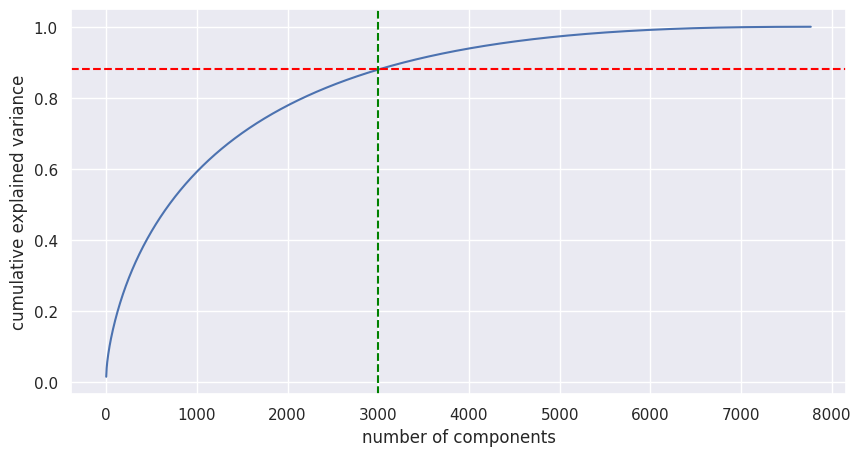

In [ ]:
# PCA Cumulative Explained Variance VS Number of Components
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(transformer.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axhline(y= 0.88, color='red', linestyle='--')
plt.axvline(x= 3000, color='green', linestyle='--')

## As a result, we can pull the top 3000 components out of the model to make it simpler and less dimensional while still being able to account for more than 88% of variance.

In [ ]:
# reducing the dimensions to 3000 using pca
transformer = PCA(n_components=3000)
transformer.fit(X.toarray())
X_transformed = transformer.transform(X.toarray())
X_transformed.shape

(7770, 3000)

In [ ]:
# transformed output
X_transformed

array([[ 0.19995114, -0.02252385, -0.03327842, ...,  0.00594529,
         0.0030472 ,  0.00097113],
       [-0.06628524, -0.04000562,  0.0106751 , ...,  0.00469119,
         0.00195953, -0.00448638],
       [-0.0838412 , -0.06283845, -0.00820336, ...,  0.00163658,
        -0.00122645,  0.00421295],
       ...,
       [-0.11423088,  0.29623611,  0.19469225, ...,  0.00343019,
         0.00163814,  0.00047644],
       [ 0.12517519,  0.02107247, -0.01124392, ..., -0.02043632,
         0.0038987 , -0.01176531],
       [-0.11067017,  0.40988472,  0.21294386, ..., -0.00330834,
         0.00243084,  0.00136294]])

In [ ]:
# Applying PCA
X_vectorized = vectorizer.transform(df['text_'])
X= transformer.transform(X_vectorized.toarray())

In [ ]:
# final output
X

array([[ 0.19995114, -0.02252385, -0.03327842, ...,  0.00594529,
         0.0030472 ,  0.00097113],
       [-0.06628524, -0.04000562,  0.0106751 , ...,  0.00469119,
         0.00195953, -0.00448638],
       [-0.0838412 , -0.06283845, -0.00820336, ...,  0.00163658,
        -0.00122645,  0.00421295],
       ...,
       [-0.11423088,  0.29623611,  0.19469225, ...,  0.00343019,
         0.00163814,  0.00047644],
       [ 0.12517519,  0.02107247, -0.01124392, ..., -0.02043632,
         0.0038987 , -0.01176531],
       [-0.11067017,  0.40988472,  0.21294386, ..., -0.00330834,
         0.00243084,  0.00136294]])

# **Model Implementation :-Hierarchical Clustering**

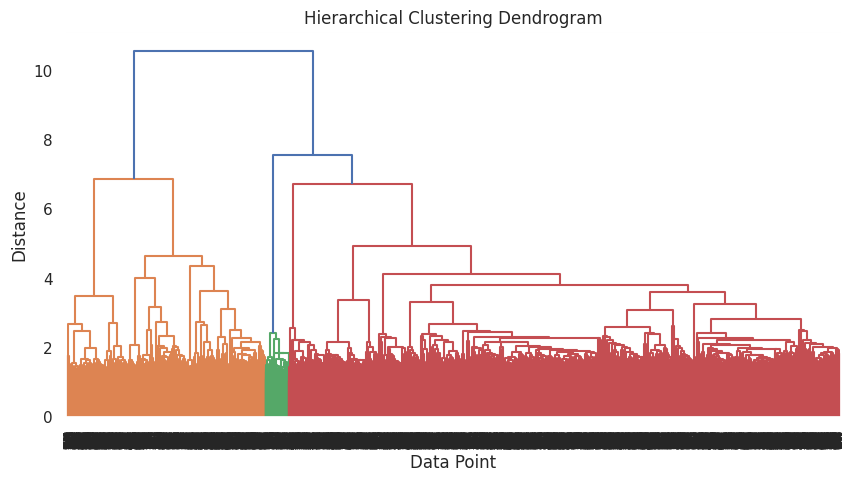

In [ ]:
linkage_matrix = linkage(X, method='ward')  # Ward's linkage method

# Plot dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Point')
plt.ylabel('Distance')
plt.show()

### Clustering the data into 5 clusters

In [ ]:
num_clusters = 5  # Specify the desired number of clusters
cluster_labels = AgglomerativeClustering(n_clusters=num_clusters, metric='euclidean', linkage='ward')
cluster_labels.fit_predict(X)


array([1, 0, 0, ..., 2, 1, 2])

In [ ]:
# Adding a  Hierarchical number attribute
df['hierarchical_cluster_no'] = cluster_labels.labels_

In [ ]:
# Number of movies and tv shows in each cluster
cluster_tvshows = df[df["type"] == "TV Show"]
cluster_movies = df[df["type"] == "Movie"]
temp_df1 = cluster_tvshows['hierarchical_cluster_no'].value_counts().reset_index()
temp_df2 = cluster_movies['hierarchical_cluster_no'].value_counts().reset_index()


# create trace1
trace1 = go.Bar(
                x = temp_df1['index'],
                y = temp_df1['hierarchical_cluster_no'],
                name="TV Shows",
                marker_color='indianred')
# create trace2
trace2 = go.Bar(
                x = temp_df2['index'],
                y = temp_df2['hierarchical_cluster_no'],
                name = "Movies",
                marker_color='lightsalmon')


layout = go.Layout(title = 'Number of movies and tv shows in each cluster' , xaxis = dict(title = 'Cluster No'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace1, trace2], layout = layout)
fig.show(renderer='colab')

## building word cloud function for different cluster

In [ ]:
def generate_wordcloud(algoritham_column_name,column_name):
  k=list(df[algoritham_column_name].unique())
  k.sort()
  # Building a wordcloud for column
  for i in k:
    _0=df[df[algoritham_column_name]==i]
    text=_0[column_name]
    text = " ".join(word for word in text)
# Create stopword list:
    stopwords = set(STOPWORDS)

# Generate a word cloud image
    wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)

# Display the generated image:
# the matplotlib way:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f'Cluster no : {i+1}')
    plt.show()

## Building wordclouds for different clusters built ( Hierarchical clusters )

In [ ]:
# Building a wordcloud for listed_in column
generate_wordcloud('hierarchical_cluster_no','listed_in')

In [ ]:
# Building a wordcloud for Description column
generate_wordcloud('hierarchical_cluster_no','description')

In [ ]:
# Hierarchical Cluster Names
hierarchical_cluster_names={0:'Family,International',
                            1:'Tv Show,Kids TV',
                            2:'Music,Documentary',
                            3:'Love,Life',
                            4:'Stand,Comedy',
                             }

In [ ]:
# Adding a Hierarchical cluster name attribute
df['hierarchical_cluster_name']=df['hierarchical_cluster_no'].map(hierarchical_cluster_names)

## **Better Visualisation for Hierarchical Clusters using Plotly**

In [ ]:
# Better Visualisation for Hierarchical Clusters using Plotly
fig = px.scatter(df, x=X[:, 0], y=X[:, 1], color='hierarchical_cluster_name',hover_name='hierarchical_cluster_no',
                 hover_data=[ 'type', 'title', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in','hierarchical_cluster_no'] )
fig.update_traces(marker=dict(size=7,
                              line=dict(width=1,
                                        color='black')))
fig.show()


# **Model Implementation :-  K-means Clustering**

## K Should be Known

In [ ]:
# K Should be Known
k_values = range(2, 20)
silhouette_scores = []
inertias = []
for k in k_values:
    kmeans = KMeans(n_clusters=k,random_state=33)
    labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, labels)
    silhouette_scores.append(silhouette_avg)
    inertias.append(kmeans.inertia_)

## Silhouette Score

In [ ]:
# Silhouette Score method to find the optimal value of k
fig = px.line( x=k_values, y=silhouette_scores, markers=True,labels={'x': 'Number of Clusters (k)',
                                                                     'y': 'Silhouette Score',"species": "Species of Iris"},
               title='Silhouette Score for different k values')
fig.show()

## **16** clusters overall receive the highest silhouette scores.

## Elbow method

In [ ]:
# Elbow method to find the optimal value of k
fig = px.line( x=k_values, y=inertias, markers=True,labels={'x': 'Number of Clusters (k)',
                                                                     'y': 'Sum of Squared Distances',"species": "Species of Iris"},
               title='Elbow Method')
fig.show()

## Clustering the data into **16** clusters

In [ ]:
# fitting the k means algorithm on lower features
kmeans= KMeans(n_clusters=16, init= 'k-means++',max_iter=300, n_init=1,random_state=33)
kmeans.fit(X)

KMeans(n_clusters=16, n_init=1, random_state=33)

In [ ]:
label = kmeans.fit_predict(X)

## Evaluation metrics

In [ ]:
# Evaluation metrics - distortion, Silhouette score
inertia = kmeans.inertia_
silhouette_avg = silhouette_score(X, labels)

print("Inertia:", inertia)
print("Silhouette Score:", silhouette_avg)

Inertia: 6344.807033096067
Silhouette Score: 0.01071091060610867


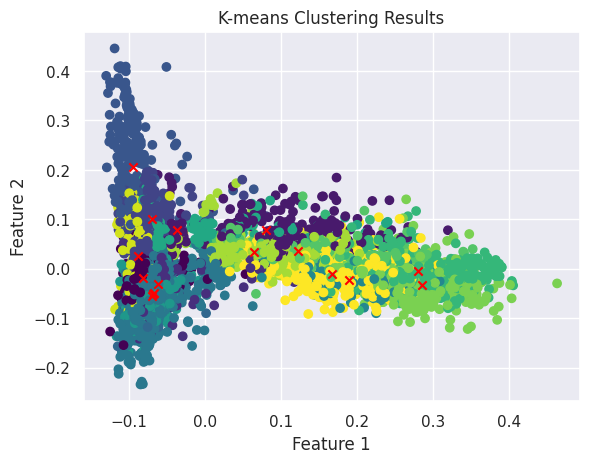

In [ ]:
# Visualize clustering results
plt.scatter(X[:, 0], X[:, 1], c=label, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')
plt.title('K-means Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [ ]:
# Visualize clustering results using Plotly visualization Library
fig = px.scatter(df, x=X[:, 0], y=X[:, 1], color=label)
fig.show()

In [ ]:
# Adding a kmeans cluster number attribute
df['cluster_no'] = kmeans.labels_

In [ ]:
df.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,text_clustering,text_,hierarchical_cluster_no,hierarchical_cluster_name,cluster_no
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0,international tv shows tv dramas tv scifi fan...,intern tv show tv drama tv scifi fantasi futur...,1,"Tv Show,Kids TV",15
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0,dramas international movies after a devastatin...,drama intern movi devast earthquak hit mexico ...,0,"Family,International",6
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018.0,horror movies international movies when an arm...,horror movi intern movi armi recruit found dea...,0,"Family,International",6
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",UnitedStates,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017.0,action adventure independent movies scifi fa...,action adventur independ movi scifi fantasi po...,1,"Tv Show,Kids TV",2
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",UnitedStates,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020.0,dramas a brilliant group of students become ca...,drama brilliant group student becom cardcount ...,0,"Family,International",6


In [ ]:
# Number of movies and tv shows in each cluster
cluster_tvshows = df[df["type"] == "TV Show"]
cluster_movies = df[df["type"] == "Movie"]
temp_df1 = cluster_tvshows['cluster_no'].value_counts().reset_index()
temp_df2 = cluster_movies['cluster_no'].value_counts().reset_index()


# create trace1
trace1 = go.Bar(
                x = temp_df1['index'],
                y = temp_df1['cluster_no'],
                name="TV Shows",
                marker_color='indianred')
# create trace2
trace2 = go.Bar(
                x = temp_df2['index'],
                y = temp_df2['cluster_no'],
                name = "Movies",
                marker_color='lightsalmon')


layout = go.Layout(title = 'Number of movies and tv shows in each cluster' , xaxis = dict(title = 'Cluster No'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace1, trace2], layout = layout)
fig.show(renderer='colab')

## Building wordclouds for different clusters built

In [ ]:
# Building a wordcloud for Description column
generate_wordcloud('cluster_no','description')

In [ ]:
# Building a wordcloud for listed_in column
generate_wordcloud('cluster_no','listed_in')

In [ ]:
# Kmeans Cluster Names
names={0:'Family,Children',
       1:'RealityTV,Docuseries',
       2:'Find, Adventure',
       3:'Documentary',
       4:'Music,Documentary',
       5:'Career,International',
       6:'Love,International',
       7:'TV Dramas,Mysteries',
       8:'Horror,Trillers',
       9:'Comedy Stand,Talk Shows',
       10:'Crime ,Tv Shows',
       11:'World,Reality Tv',
       12:'Love,Romantic TV',
       13:'Kids,Anime',
       14:'Sports Movies',
       15:'TV Drama,Family'}

In [ ]:
# Adding a kmeans cluster name attribute
df['cluster_name']=df['cluster_no'].map(names)

## Better Visualisation for Clusters using Plotly

In [ ]:
# Better Visualisation for Clusters using Plotly
fig = px.scatter(df, x=X[:, 0], y=X[:, 1], color='cluster_name',hover_name='cluster_no',
                 hover_data=[ 'type', 'title', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in','cluster_no'] )
fig.update_traces(marker=dict(size=7,
                              line=dict(width=1,
                                        color='black')))
fig.show()

# **Cluster Names**
###Cluster 1 :- Family,Children
###Cluster 2 :-RealityTV,Docuseries
###Cluster 3 :-Find, Adventure
###Cluster 4 :-Documentary
###Cluster 5 :-Music,Documentary
###Cluster 6 :-Career,International
###Cluster 7 :-Love,International
###Cluster 8 :-TV Dramas,Mysteries
###Cluster 9 :-Horror,Trillers
###Cluster 10 :-Comedy Stand,Talk Shows
###Cluster 11 :-Crime ,Tv Shows
###Cluster 12 :-World,Reality Tv
###Cluster 13 :-Love,Romantic TV
###Cluster 14 :-Kids,Anime
###Cluster 15 :-Sports Movies
###Cluster 16 :-TV Drama,Family


# **Building the Recommendation System**

In [ ]:
#cosine Similarity

similarities = cosine_similarity(X)

In [ ]:
# New dataset for Recommendation System
recsys= pd.DataFrame(similarities, columns=df['title'], index=df['title']).reset_index()

recsys.head()

title,title,3%,7:19,23:59,9,21,46,122,187,706,...,Zombie Dumb,Zombieland,Zona Rosa,Zoo,Zoom,Zozo,Zubaan,Zulu Man in Japan,Zumbo's Just Desserts,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS
0,3%,1.000000,-0.021093,0.033716,0.081671,-0.019571,0.050648,-0.034634,0.001503,-0.027380,...,0.045130,-0.036808,0.035600,0.084888,-0.036245,-0.020056,-0.028010,-0.033483,0.024873,-0.035925
1,7:19,-0.021093,1.000000,0.002311,-0.008594,0.000994,-0.014384,-0.001220,0.028898,0.001247,...,-0.035147,-0.013070,0.036967,0.004241,0.011676,0.004096,-0.003387,0.085927,-0.010539,-0.013959
2,23:59,0.033716,0.002311,1.000000,-0.006011,-0.010127,-0.020069,0.042028,-0.008821,0.040946,...,-0.035521,0.028744,-0.033746,0.047324,0.045856,0.002509,-0.009107,-0.004293,-0.014879,-0.017051
3,9,0.081671,-0.008594,-0.006011,1.000000,0.036257,-0.023092,-0.010577,-0.012348,-0.003441,...,-0.037710,0.017688,-0.039826,0.012606,-0.016136,-0.010016,0.052033,-0.017281,-0.015918,-0.016760
4,21,-0.019571,0.000994,-0.010127,0.036257,1.000000,-0.007987,-0.011612,0.032845,-0.007022,...,-0.030402,0.044785,-0.033458,-0.004231,-0.007603,0.000747,-0.009120,-0.010694,-0.012101,-0.009114


In [ ]:
# Function for Recommendation System
def recommend_similar(input_movies):
  try:
    recommendations=pd.DataFrame(recsys.nlargest(11,input_movies)['title'])
    recommendations=recommendations[recommendations['title']!=input_movies].reset_index()
    return recommendations.head(10)
  except:
    return('thies movie not present')


In [ ]:
recommend_similar('Naruto')

,index,title
0,4393,Naruto Shippuden: The Movie
1,4390,Naruto Shippûden the Movie: Bonds
2,4392,Naruto Shippuden : Blood Prison
3,4396,Naruto the Movie 3: Guardians of the Crescent ...
4,5468,Seis Manos
5,869,Beyblade: Metal Fusion
6,4395,Naruto the Movie 2: Legend of the Stone of Gelel
7,5933,SWORDGAI The Animation
8,3032,InuYasha the Movie: Affections Touching Across...
9,6460,The Idhun Chronicles


In [ ]:
recommend_similar('My Stupid Boss 2')

,index,title
0,4831,Phir Hera Pheri
1,2856,Humpty Sharma Ki Dulhania
2,1029,Bombairiya
3,1994,Employee of the Month
4,5067,Rake
5,7332,Union Leader
6,1553,Curtiz
7,7575,Whisky
8,2582,Hamburger Hill
9,3110,Jalpari: The Desert Mermaid


# **Summary and Conclusion**
### I have clustered Netflix Moves and TV Shows on the basis of Genre and Description.
### For clustering, first of all punctuation marks have been removed by using 'NLTK' library in text format, then by converting the format to lower case, stop words have been removed. I used porter stemming to get the base format in words.
###Through TFIDF Vectorization, I created a total of 10000 attributes.
### I used Principal Component Analysis (PCA) to handle the curse of dimensionality. 3000 components were able to capture more than 88% of variance, and hence, the number of components were restricted to 3000.
### To find K, the silhouette scores and elbow method are used. 16 clusters have scored the highest according to silhouette scores
### Clusters are created using the K-Means clustering algorithm, and the optimal number of clusters is 16.
### Final cluster visualization done using plotly library.
### A content based recommender system was built using the similarity matrix obtained after using cosine similarity. This recommender system will make 10 recommendations to the user based on the type of show they watched.